#Download

In [ ]:
!kaggle datasets download -d vasukipatel/face-recognition-dataset
!unzip -q face-recognition-dataset.zip
# !pip install ultralytics
!pip install keras_facenet

Dataset URL: https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset
License(s): CC0-1.0
100% 725M/726M [00:09<00:00, 108MB/s]
100% 726M/726M [00:09<00:00, 82.0MB/s]
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.5 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=9bd78376a472d8346f85f160d0118d9fb684f86998c6a3e4dd355dc7b00b958e
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset
dataset_dir = '/content/Faces/Faces'

# Path to the output directory
output_dir = '/content/Dataset'

# Create the output directories if they don't exist
os.makedirs(output_dir, exist_ok=True)

# Get all images in the dataset directory
all_images = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]

# Function to extract the base name
def extract_base_name(filename):
    return filename.split('_')[0]  # Split by underscore and take the first part

# Organize images by base name
base_name_images = {}
for image in all_images:
    base_name = extract_base_name(image)
    if base_name not in base_name_images:
        base_name_images[base_name] = []
    base_name_images[base_name].append(image)

# Function to create directories and split data
def organize_split_data(base_name_images, output_dir, train_size=0.7, val_size=0.15, test_size=0.15):
    for base_name, images in base_name_images.items():
        # Create base directories
        train_base_dir = os.path.join(output_dir, 'train', base_name)
        val_base_dir = os.path.join(output_dir, 'val', base_name)
        test_base_dir = os.path.join(output_dir, 'test', base_name)

        os.makedirs(train_base_dir, exist_ok=True)
        os.makedirs(val_base_dir, exist_ok=True)
        os.makedirs(test_base_dir, exist_ok=True)

        # Split data
        train_val_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
        train_images, val_images = train_test_split(train_val_images, test_size=val_size/(train_size + val_size), random_state=42)

        # Function to copy images
        def copy_images(images, src_dir, dest_dir):
            for image in images:
                shutil.copy(os.path.join(src_dir, image), os.path.join(dest_dir, image))

        # Copy images to respective directories
        copy_images(train_images, dataset_dir, train_base_dir)
        copy_images(val_images, dataset_dir, val_base_dir)
        copy_images(test_images, dataset_dir, test_base_dir)

# Call the function to organize and split data
organize_split_data(base_name_images, output_dir)

print('Dataset split into train, validation, and test sets based on base names.')


Dataset split into train, validation, and test sets based on base names.


#Augmented Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/Dataset/train"
VALIDATION_DIR = "/content/Dataset/val"
TESTING_DIR = "/content/Dataset/test"

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1/255.)
testing_datagen = ImageDataGenerator(rescale = 1/255.)

training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size = 10,
                                                          target_size = (160, 160),
                                                          class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size = 10,
                                                             target_size = (160, 160),
                                                             class_mode='categorical')

testing_generator = testing_datagen.flow_from_directory(TESTING_DIR,
                                                        batch_size=10,
                                                        target_size=(160, 160),
                                                        class_mode='categorical',
                                                        shuffle=False)


Found 1769 images belonging to 31 classes.
Found 395 images belonging to 31 classes.
Found 398 images belonging to 31 classes.


In [ ]:
print("Training class indices:", training_generator.class_indices)
print("Validation class indices:", validation_generator.class_indices)

Training class indices: {'Akshay Kumar': 0, 'Alexandra Daddario': 1, 'Alia Bhatt': 2, 'Amitabh Bachchan': 3, 'Andy Samberg': 4, 'Anushka Sharma': 5, 'Billie Eilish': 6, 'Brad Pitt': 7, 'Camila Cabello': 8, 'Charlize Theron': 9, 'Claire Holt': 10, 'Courtney Cox': 11, 'Dwayne Johnson': 12, 'Elizabeth Olsen': 13, 'Ellen Degeneres': 14, 'Henry Cavill': 15, 'Hrithik Roshan': 16, 'Hugh Jackman': 17, 'Jessica Alba': 18, 'Kashyap': 19, 'Lisa Kudrow': 20, 'Margot Robbie': 21, 'Marmik': 22, 'Natalie Portman': 23, 'Priyanka Chopra': 24, 'Robert Downey Jr': 25, 'Roger Federer': 26, 'Tom Cruise': 27, 'Vijay Deverakonda': 28, 'Virat Kohli': 29, 'Zac Efron': 30}
Validation class indices: {'Akshay Kumar': 0, 'Alexandra Daddario': 1, 'Alia Bhatt': 2, 'Amitabh Bachchan': 3, 'Andy Samberg': 4, 'Anushka Sharma': 5, 'Billie Eilish': 6, 'Brad Pitt': 7, 'Camila Cabello': 8, 'Charlize Theron': 9, 'Claire Holt': 10, 'Courtney Cox': 11, 'Dwayne Johnson': 12, 'Elizabeth Olsen': 13, 'Ellen Degeneres': 14, 'Henry 

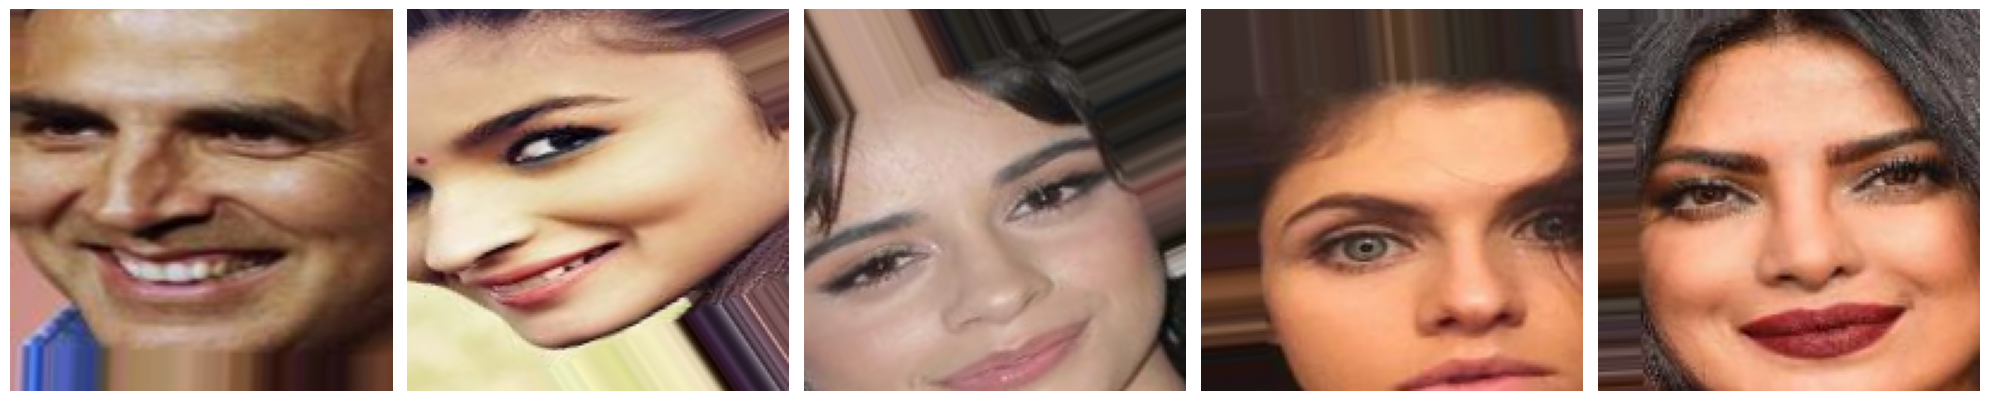

In [ ]:
import matplotlib.pyplot as plt
# Generate a batch of augmented images
sample_batch = next(training_generator)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


sample_images, _ = sample_batch

# Visualize 5 augmented images
plot_images(sample_images[:5])

#Face Detection

In [ ]:
%cd /content
from ultralytics import YOLO
model = YOLO('https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt')

/content


100%|██████████| 5.96M/5.96M [00:00<00:00, 97.3MB/s]


WARNING ⚠️ yolov8n-face.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['omegaconf'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=66ee2bc8786037baee5207aa1417e97940c5ada0b4e1c205ff6241a6c210cb01
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh7k_5c5/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e3

In [ ]:
%cd /content
!yolo export model=yolov8n.pt format=tflite

/content
100% 6.23M/6.23M [00:00<00:00, 94.6MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 282.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 294.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 286.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#Model Facenet

In [ ]:
import tensorflow as tf
from keras_facenet import FaceNet
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,Flatten

embedder = FaceNet()
model = embedder.model
for layer in model.layers:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(training_generator.num_classes, activation='softmax')(x)
fine_tuned_model = Model(inputs=model.input, outputs=output)

In [ ]:
fine_tuned_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, None, None, 32)       96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, None, None, 32)       0         ['Conv2d_1a_3x3_BatchNorm[

In [ ]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.95 and logs.get('accuracy') > 0.95:
            self.model.stop_training = True
            print("Early stopping triggered.")

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the model
fine_tuned_model.compile(optimizer=Adam(1e-3),
                         loss=CategoricalCrossentropy(),
                         metrics=['accuracy'])

# Train the model
history = fine_tuned_model.fit(
    training_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[Callbacks()]
)

Epoch 1/50
177/177 [==============================] - 26s 98ms/step - loss: 3.0819 - accuracy: 0.1357 - val_loss: 1.9485 - val_accuracy: 0.6051
Epoch 2/50
177/177 [==============================] - 16s 89ms/step - loss: 1.8956 - accuracy: 0.4590 - val_loss: 0.5752 - val_accuracy: 0.9215
Epoch 3/50
177/177 [==============================] - 17s 99ms/step - loss: 1.2305 - accuracy: 0.6235 - val_loss: 0.2407 - val_accuracy: 0.9544
Epoch 4/50
177/177 [==============================] - 16s 88ms/step - loss: 0.9270 - accuracy: 0.7213 - val_loss: 0.1279 - val_accuracy: 0.9772
Epoch 5/50
177/177 [==============================] - 16s 88ms/step - loss: 0.7703 - accuracy: 0.7671 - val_loss: 0.0778 - val_accuracy: 0.9873
Epoch 6/50
177/177 [==============================] - 16s 88ms/step - loss: 0.6621 - accuracy: 0.7993 - val_loss: 0.0504 - val_accuracy: 0.9949
Epoch 7/50
177/177 [==============================] - 16s 88ms/step - loss: 0.5649 - accuracy: 0.8242 - val_loss: 0.0357 - val_accuracy:

In [ ]:
testing_loss, testing_accuracy = fine_tuned_model.evaluate(testing_generator, steps=testing_generator.samples // testing_generator.batch_size)
print(f"Test accuracy: {testing_accuracy * 100:.2f}%")


39/39 [==============================] - 1s 26ms/step - loss: 0.0031 - accuracy: 0.9974
Test accuracy: 99.74%


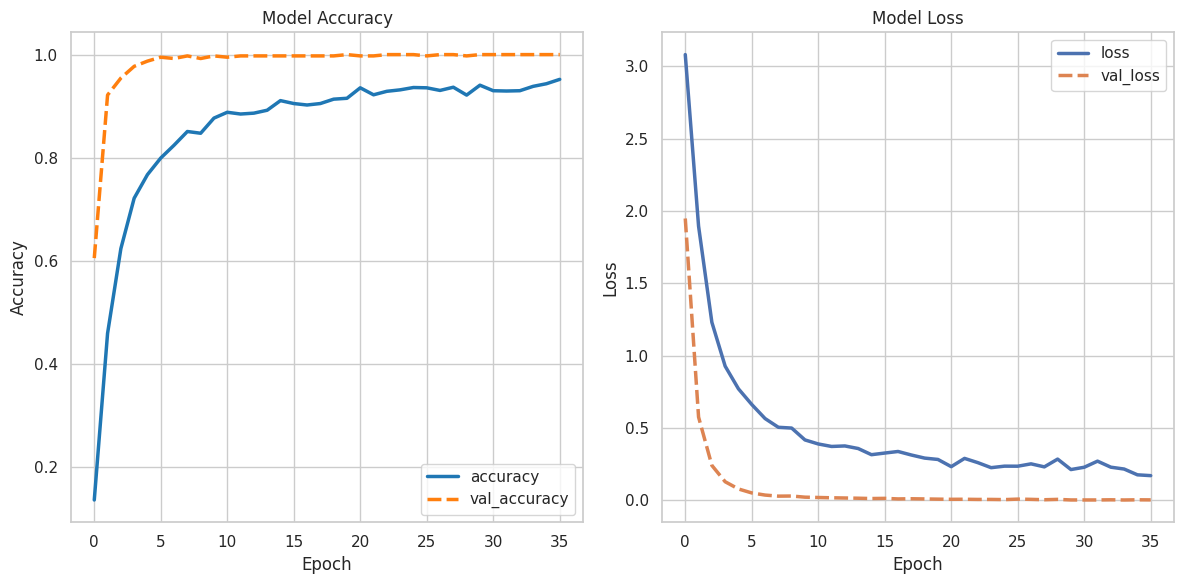

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Set up the style
sns.set(style="whitegrid")

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette="tab10", linewidth=2.5)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['loss', 'val_loss']], linewidth=2.5)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
fine_tuned_model.save('saved_model')

#Convert Model

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
  

In [ ]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/saved_model \
    /content/keras_model

2024-06-21 02:53:47.771219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 02:53:48.801460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-21 02:53:52.221725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-21 02:53:52.827316: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

In [ ]:
%cd /content/keras_model
!zip saved_model.zip *.bin *.json

/content/keras_model
  adding: group1-shard10of23.bin (deflated 7%)
  adding: group1-shard11of23.bin (deflated 7%)
  adding: group1-shard12of23.bin (deflated 7%)
  adding: group1-shard13of23.bin (deflated 7%)
  adding: group1-shard14of23.bin (deflated 7%)
  adding: group1-shard15of23.bin (deflated 7%)
  adding: group1-shard16of23.bin (deflated 7%)
  adding: group1-shard17of23.bin (deflated 7%)
  adding: group1-shard18of23.bin (deflated 7%)
  adding: group1-shard19of23.bin (deflated 7%)
  adding: group1-shard1of23.bin (deflated 7%)
  adding: group1-shard20of23.bin (deflated 7%)
  adding: group1-shard21of23.bin (deflated 7%)
  adding: group1-shard22of23.bin (deflated 7%)
  adding: group1-shard23of23.bin (deflated 7%)
  adding: group1-shard2of23.bin (deflated 7%)
  adding: group1-shard3of23.bin (deflated 7%)
  adding: group1-shard4of23.bin (deflated 8%)
  adding: group1-shard5of23.bin (deflated 7%)
  adding: group1-shard6of23.bin (deflated 7%)
  adding: group1-shard7of23.bin (deflated 7%)

In [ ]:
# prompt: dowload file

from google.colab import files
files.download("/content/keras_model/saved_model.zip")
files.download("/content/yolov8n_saved_model/yolov8n_float32.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>